# TA session #02

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error,confusion_matrix, classification_report, roc_curve, auc, accuracy_score
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline
plt.style.use('seaborn-white')

In [2]:
## Load dataset(Hitters.csv) and drop NA(null) rows.
data = pd.read_csv('Data/Hitters.csv', index_col=0)
data = data.dropna()

In [3]:
## Convert object-type variables to integer(float)-type variables (Generate dummy variables)
data = pd.get_dummies(data, columns=['League', 'Division', 'NewLeague'])

In [4]:
data.head(3)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,...,PutOuts,Assists,Errors,Salary,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,...,632,43,10,475.0,0,1,0,1,0,1
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,...,880,82,14,480.0,1,0,0,1,1,0
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,...,200,11,3,500.0,0,1,1,0,0,1


# 1. Regression: Random Forest

In [5]:
X = data.drop(['Salary'], axis=1)
y = data['Salary']

## Split train/test sets. (8:2)
## Do proper normalization.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1008)

In [6]:
## Fit the model and plot the result. (x: predictions, y: truths)
model = RandomForestRegressor()
model.fit(X_train, y_train)

/home/anaconda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [7]:
## Print the MSE result.
pred = model.predict(X_test)
mean_squared_error(y_test, pred)

93214.00344926697

(0, 1800)

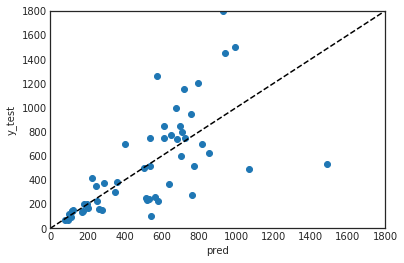

In [8]:
plt.scatter(pred, y_test, label='medv')
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
plt.xlabel('pred')
plt.ylabel('y_test')
plt.xlim(0,1800)
plt.ylim(0,1800)

# 2. Classification: Random Forest

In [9]:
### Data Preparation ###

X = data.drop(['Salary'], axis=1)
threshold = np.median(data['Salary'])
y = (data['Salary'] > threshold).astype(int).values

## Split train/test sets. (8:2)
## Do proper normalization.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1008)

In [10]:
## Fit the model and plot the result. (x: predictions, y: truths)
model = RandomForestClassifier()
model.fit(X_train, y_train)

/home/anaconda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [11]:
y_test

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0])

In [12]:
## Print the MSE result.
pred = model.predict(X_test)
mean_squared_error(y_test, pred)

0.16981132075471697

In [13]:
pred

array([1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0])

In [14]:
## Print the results. - Confusion matrix, Accuracy, Precision/Recall, F1-score
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.88      0.79      0.83        28
           1       0.79      0.88      0.83        25

   micro avg       0.83      0.83      0.83        53
   macro avg       0.83      0.83      0.83        53
weighted avg       0.84      0.83      0.83        53



In [15]:
confusion_matrix(y_test, model.predict(X_test))

array([[22,  6],
       [ 3, 22]])

# 3. Classification: SVM

In [16]:
## change h values depending on the coding speed...
def PlotSVMResult(svc, x, y, predictors, h=0.1):
    xx, yy = np.meshgrid(np.arange(-0.1, 1.1, h), np.arange(-0.1, 1.1, h))
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    sv = svc.support_vectors_

    # plt.figure(figsize=(8, 6))
    plt.pcolormesh(xx, yy, Z, cmap=ListedColormap(['#d8ebee', '#e7b7a3']))
    plt.scatter(x[:, 0], x[:, 1], s=50, c=y, cmap=plt.cm.Paired, label="Truth(Blue=Low)")
    plt.scatter(sv[:,0], sv[:,1], c='k', alpha=0.5, marker='*', s=30, label="Support Vectors")
    plt.legend()
    plt.xlabel(predictors[0])
    plt.ylabel(predictors[1])
    plt.show()

In [17]:
data.head(5)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,...,PutOuts,Assists,Errors,Salary,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,...,632,43,10,475.0,0,1,0,1,0,1
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,...,880,82,14,480.0,1,0,0,1,1,0
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,...,200,11,3,500.0,0,1,1,0,0,1
-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,...,805,40,4,91.5,0,1,1,0,0,1
-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,19,...,282,421,25,750.0,1,0,0,1,1,0


In [18]:
### Data Preparation ###
features = ['CRBI', 'CHmRun']
# features = ['Years', 'Hits']
X = data.drop(['Salary'], axis=1)
X = X[features]
threshold = np.median(data['Salary'])
y = (data['Salary'] > threshold).astype(int).values
normalize = MinMaxScaler()
fitted = normalize.fit(X)
X = normalize.transform(X)
## Split train/test sets. (8:2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1008)
## Do proper normalization.
# normalize = MinMaxScaler()
# fitted = normalize.fit(X_train)
# X_train = normalize.transform(X_train)

/home/anaconda/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [19]:
## Fit the model and plot the result. (x: predictor1, y: predictor2, color: predicted class)
svc1 = SVC(C= 1.0, kernel='linear', gamma='auto')
svc1.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

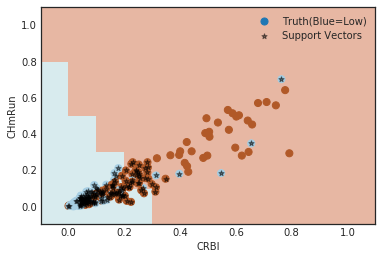

In [20]:
PlotSVMResult(svc1, X_train, y_train, features)

In [21]:
## Print the results. - Confusion matrix, Accuracy, Precision/Recall, F1-score

In [22]:
pred = svc1.predict(X_test)
print(mean_squared_error(y_test, pred))
print(classification_report(y_test, pred))

0.24528301886792453
              precision    recall  f1-score   support

           0       0.76      0.79      0.77        28
           1       0.75      0.72      0.73        25

   micro avg       0.75      0.75      0.75        53
   macro avg       0.75      0.75      0.75        53
weighted avg       0.75      0.75      0.75        53



In [23]:
## Change the kernel type and compare the results.

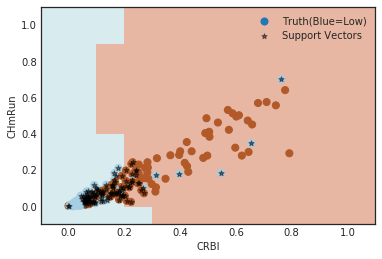

0.18867924528301888
              precision    recall  f1-score   support

           0       0.88      0.75      0.81        28
           1       0.76      0.88      0.81        25

   micro avg       0.81      0.81      0.81        53
   macro avg       0.82      0.81      0.81        53
weighted avg       0.82      0.81      0.81        53



In [24]:
svc2 = SVC(C= 5, kernel='rbf', gamma='auto')
svc2.fit(X_train, y_train)
PlotSVMResult(svc2, X_train,y_train, features)
pred = svc2.predict(X_test)
print(mean_squared_error(y_test, pred))
print(classification_report(y_test, pred))

# 4. Grid Search with SVM (tuning HPs)

In [25]:
tuned_parameters = {'kernel':['linear', 'rbf'], 'C':[i for i in range(1, 10)], 'gamma':[0.1,0.2,0.5,1.0]}
## In dictionary, list the hyperparameter candidates. e.g. C, kernel, gamma, ...

clf = GridSearchCV(SVC(), tuned_parameters, cv=5, scoring='accuracy', return_train_score=True)
clf.fit(X_train, y_train)
clf.cv_results_

/home/anaconda/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'mean_fit_time': array([0.00086327, 0.00163498, 0.00078783, 0.00151796, 0.00079637,
        0.00141344, 0.0008007 , 0.00133433, 0.00078058, 0.00151725,
        0.00078416, 0.00143657, 0.0007874 , 0.00135846, 0.00077629,
        0.00126853, 0.00075998, 0.00147252, 0.00076122, 0.00137949,
        0.00074682, 0.00123706, 0.00054326, 0.00087805, 0.00057039,
        0.00101871, 0.00053277, 0.00095539, 0.00052528, 0.00089293,
        0.00053582, 0.00084577, 0.00052485, 0.00098567, 0.00052681,
        0.00093646, 0.00052581, 0.00089364, 0.00052218, 0.00082788,
        0.00053415, 0.00098233, 0.00052295, 0.00093966, 0.00052743,
        0.00088081, 0.00053201, 0.00083427, 0.00052958, 0.00096173,
        0.00052333, 0.000911  , 0.00052614, 0.00087862, 0.0005281 ,
        0.00084839, 0.00052819, 0.00096602, 0.00053062, 0.00091019,
        0.00051956, 0.00086699, 0.00052967, 0.00083113, 0.00052357,
        0.00095687, 0.00052528, 0.00091462, 0.00053058, 0.00090594,
        0.00053124, 0.00084972]

In [26]:
## Print best HPs.
clf.best_params_

{'C': 9, 'gamma': 1.0, 'kernel': 'rbf'}

In [27]:
## For the best case, plot the result and print the accuracy.

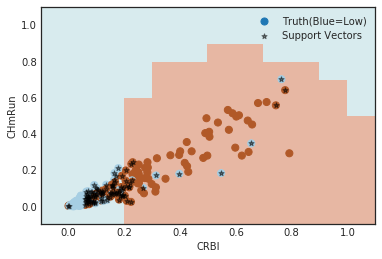

0.20754716981132076
              precision    recall  f1-score   support

           0       0.84      0.75      0.79        28
           1       0.75      0.84      0.79        25

   micro avg       0.79      0.79      0.79        53
   macro avg       0.79      0.79      0.79        53
weighted avg       0.80      0.79      0.79        53



In [32]:
svcb = SVC(C= 9, kernel='rbf', gamma=1.0)
svcb.fit(X_train, y_train)
PlotSVMResult(svcb, X_train,y_train, features)
pred = svcb.predict(X_test)
print(mean_squared_error(y_test, pred))
print(classification_report(y_test, pred))

# 5. ROC curve

0.8941400580551524 0.797142857142857


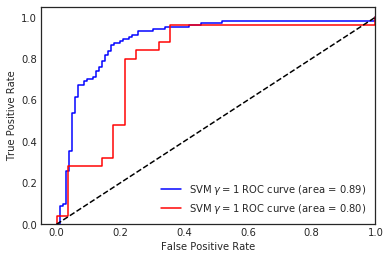

In [29]:
### Evaluate FPR and TPR for the best case from the above task.
### Get the ROC curve and AUC value.
y_train_score = svcb.decision_function(X_train)
y_test_score = svcb.decision_function(X_test)
false_pos_rate_train, true_pos_rate_train, _ = roc_curve(y_train, y_train_score)
false_pos_rate_test, true_pos_rate_test, _ = roc_curve(y_test, y_test_score)
roc_auc_train = auc(false_pos_rate_train, true_pos_rate_train)
roc_auc_test = auc(false_pos_rate_test, true_pos_rate_test)

plt.plot(false_pos_rate_train, true_pos_rate_train, label='SVM $\gamma = 1$ ROC curve (area = %0.2f)' % roc_auc_train, color='b')
plt.plot(false_pos_rate_test, true_pos_rate_test, label='SVM $\gamma = 1$ ROC curve (area = %0.2f)' % roc_auc_test, color='r')
print(roc_auc_train, roc_auc_test)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")

In [30]:
### Plot the ROC curve (x: FPR, y: TPR, adding the y=x line.)
### Print the AUC value.

0.8887880986937591 0.8913280116110305


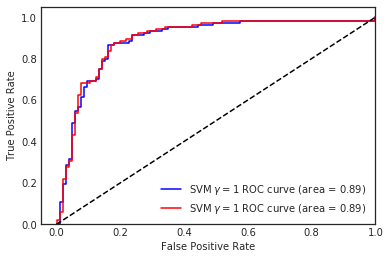

In [31]:
### Plot the several curves with different hyperparameters(model=SVM).
y_train_score1 = svc1.decision_function(X_train)
y_train_score2 = svc2.decision_function(X_train)
false_pos_rate_1, true_pos_rate_1, _ = roc_curve(y_train, y_train_score1)
false_pos_rate_2, true_pos_rate_2, _ = roc_curve(y_train, y_train_score2)
roc_auc_1 = auc(false_pos_rate_1, true_pos_rate_1)
roc_auc_2 = auc(false_pos_rate_2, true_pos_rate_2)

plt.plot(false_pos_rate_1, true_pos_rate_1, label='SVM $\gamma = 1$ ROC curve (area = %0.2f)' % roc_auc_1, color='b')
plt.plot(false_pos_rate_2, true_pos_rate_2, label='SVM $\gamma = 1$ ROC curve (area = %0.2f)' % roc_auc_2, color='r')
print(roc_auc_1, roc_auc_2)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")